# Dataset description

Data was collected from gym teachers of high school boys.
For each boy, we know the height (in cm) and their 100m sprint time (in s).
Additionally, they were all asked if they liked playing basketball, dodgeball and soccer in the class.

# Analysis

We are interested in the effect of height on sprint times

In [35]:
import pandas as pd
df = pd.read_csv('../data/gym_class.csv')

Set some basic semi-informative priors and run the linear model

In [19]:
import pymc as pm
import pytensor.tensor as pt

with pm.Model() as model:
    icept = pm.Normal('icept', 10, 10)
    hcoef = pm.Normal('hcoef', 0, 0.2)
    gcoef = pm.Normal('gcoef', 0, 2, size=3)

    res = icept + hcoef * df['height'] + pt.dot(gcoef, df[['basketball','dodgeball','soccer']].to_numpy().T)

    err = pm.HalfNormal('err', 2)
    pm.Normal('obs', res, err, observed=df['sprint'])

    trace = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [icept, hcoef, gcoef, err]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 29 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


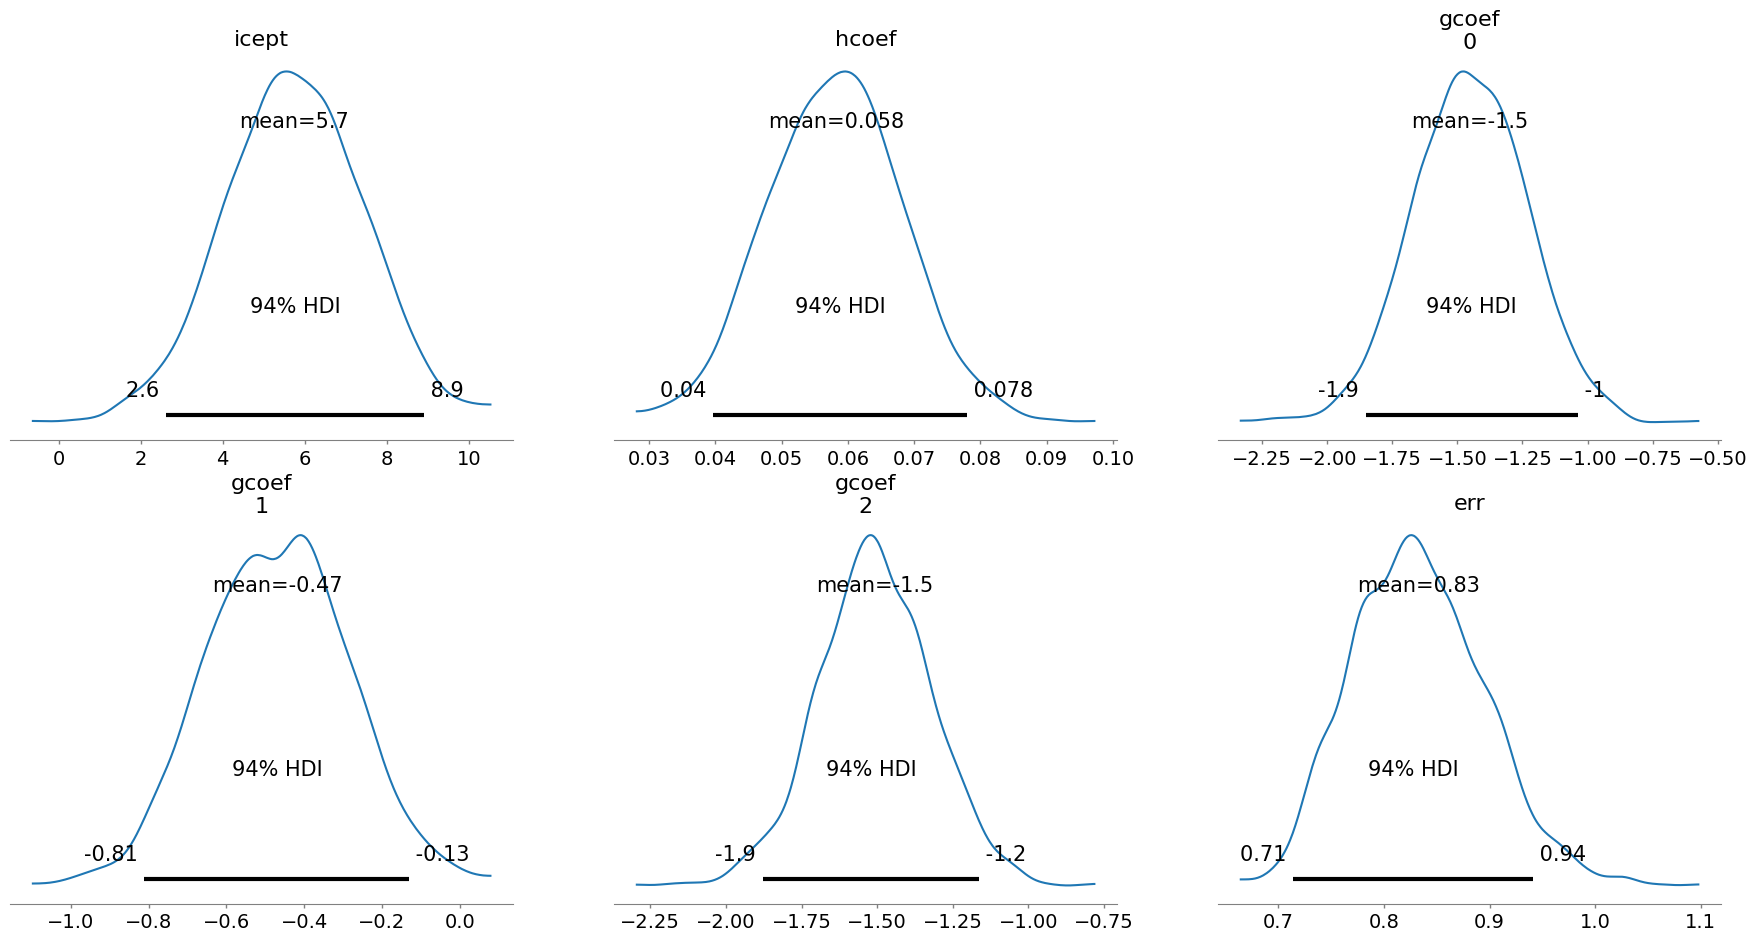

In [20]:
# Plot the distributions 
import arviz as az, matplotlib.pyplot as plt
az.plot_posterior(trace)
plt.show()

In [21]:
# Write the numerical summary table
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
icept,5.746,1.683,2.615,8.906,0.066,0.047,656.0,810.0,1.01
hcoef,0.058,0.010,0.040,0.078,0.000,0.000,671.0,791.0,1.01
gcoef[0],-1.451,0.221,-1.853,-1.036,0.007,0.005,1061.0,1079.0,1.00
gcoef[1],-0.469,0.185,-0.811,-0.129,0.005,0.003,1595.0,1282.0,1.00
gcoef[2],-1.509,0.189,-1.878,-1.161,0.005,0.004,1343.0,1171.0,1.00
err,0.833,0.063,0.714,0.941,0.002,0.001,1598.0,1358.0,1.00


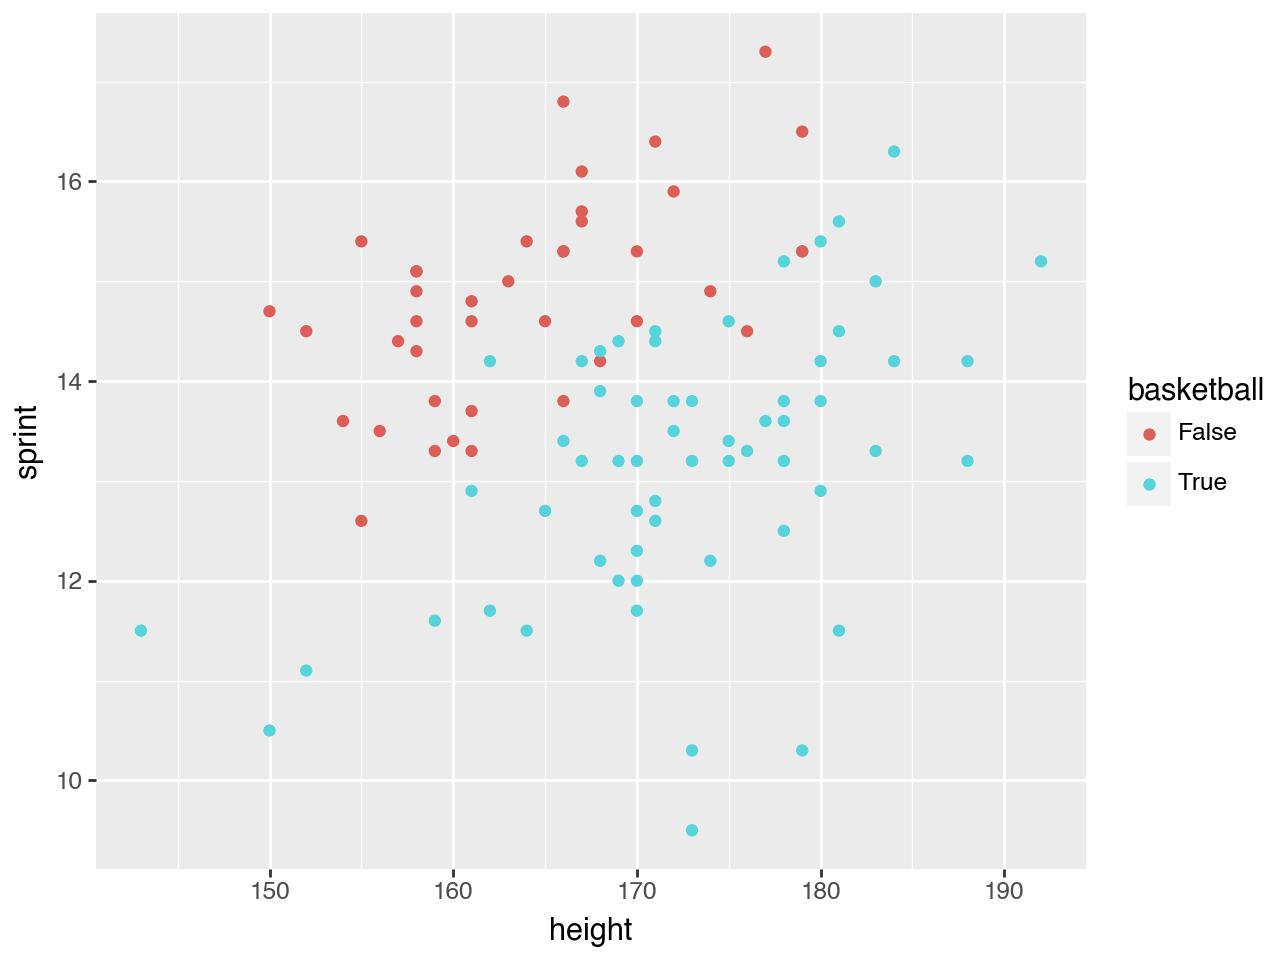

In [42]:
# Let's look at raw data
from plotnine import *
ggplot(df,aes(x='height',y='sprint', color='basketball')) + geom_point()

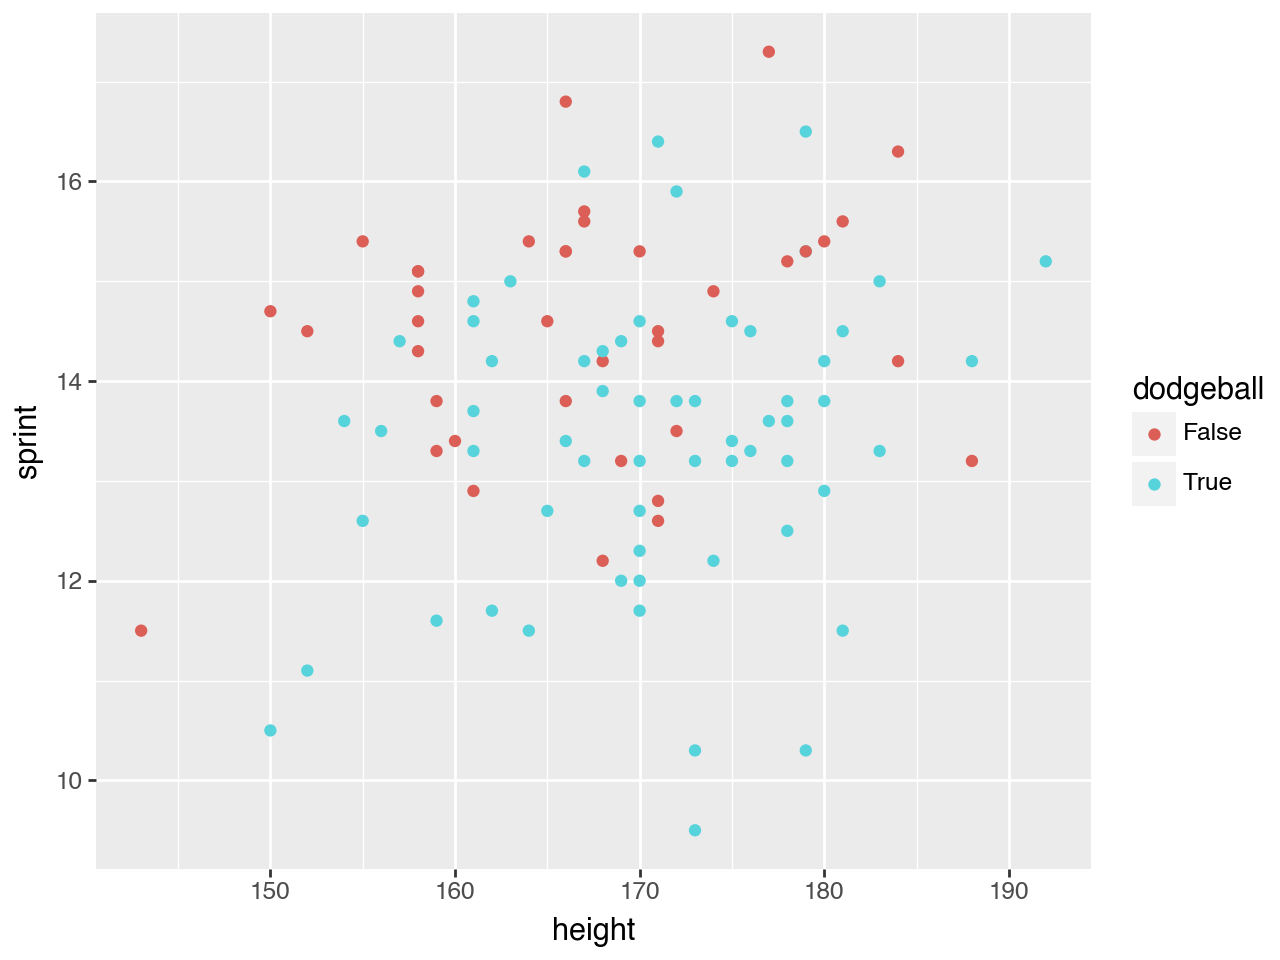

In [43]:
ggplot(df,aes(x='height',y='sprint', color='dodgeball')) + geom_point()

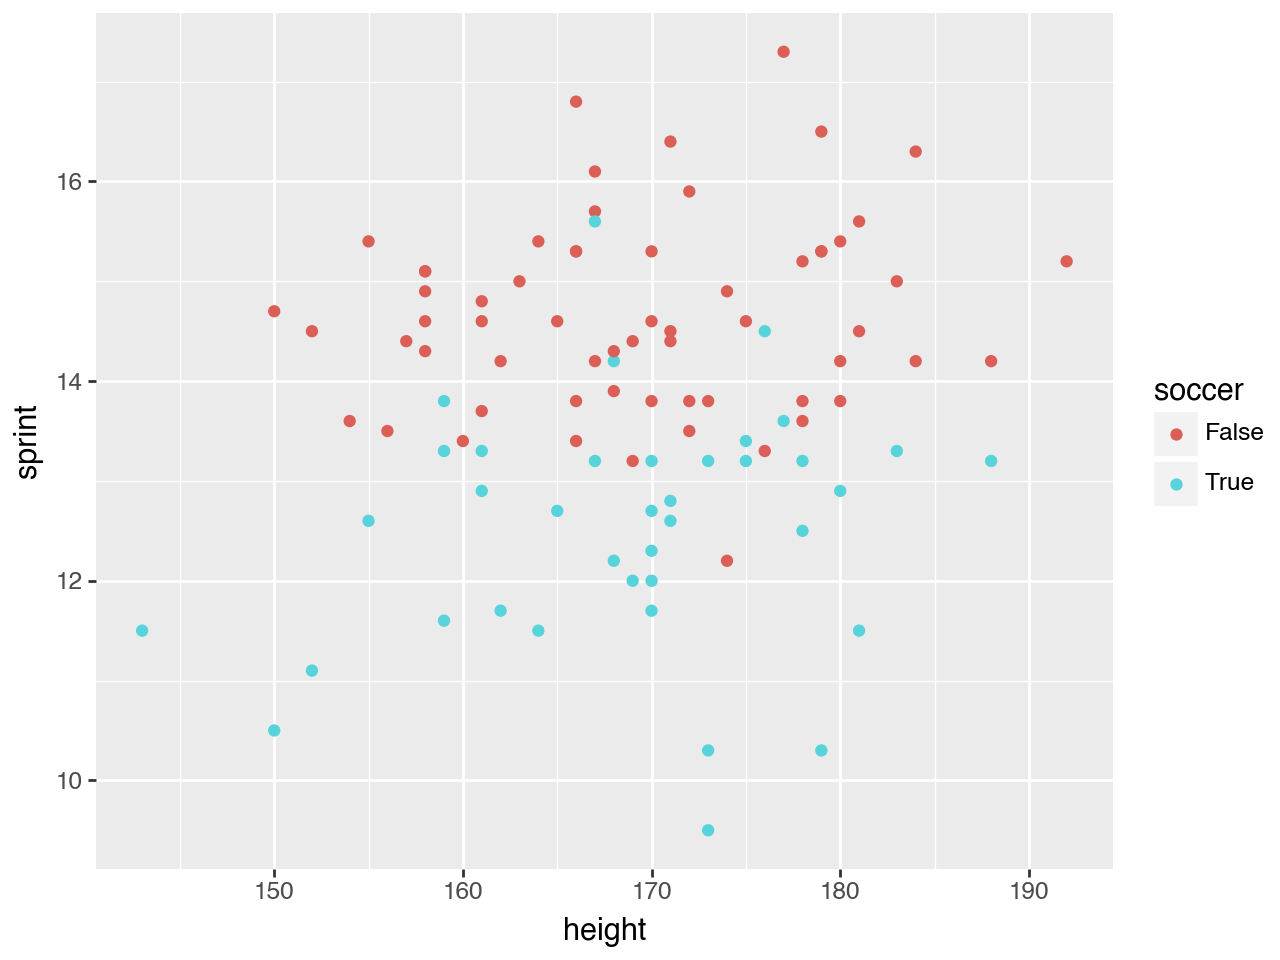

In [44]:
ggplot(df,aes(x='height',y='sprint', color='soccer')) + geom_point()